# **START-UP FUNDING ANALYSIS IN THE INDIAN ECOSYSTEM**

**Project Description**

The Indian ecosystem is dynamic and constantly evolving, thus, for every business venturing into an unknown territory i.e., a new country or landscape, the fear of the unknown normally takes precedence with regards to whether the business will succeed or not. By examining existing data spanning from 2018 to 2021 on start-up funding, this project will identify key patterns, investment behaviors, and emerging sectors within the Indian start-up ecosystem to inform strategic decision-making for venturing into this market. 


**Task Outline**

- Analyze venture funding in India from 2018 t0 2021
- Carry out a comprehensive study of datasets,examining funding distributions,sector-specific details and focal geographic points in the Indian ecosystem.

**Hypothesis**

Null Hypothesis (H0) – The funds a company receives does not depend on the sector the company invests in.
 
Alternative Hypothesis (H1) – The funds a company receives depends on the sector a company invests in.


**Questions**

1. What are the top five(5) attractive sectors?
2. How does funding vary with the location of start-ups? 
3. What is the distribution of funding amounts among start-ups each year? 
4. What are the total funding amounts per sector? 
5.	How does funding vary within the various geographical locations for start-ups?


# **1.DATA EXPLORATION,UNDERSTANDING AND ANALYSIS**



In [220]:
#Install all the necessary packages
#Import and load libraries

import pyodbc 
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
warnings.filterwarnings('ignore')

In [221]:
environment_variables = dotenv_values('.env')

# Load environment variables from .env file into a dictionaryenvironment_variables=dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
username=environment_variables.get("LOGIN")
password=environment_variables.get("PASSWORD")
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [222]:
# Create a connection string
connection=pyodbc.connect(connection_string)

In [223]:
# Sql query to access 2020 data 

query = ''' SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE' '''


In [224]:
indian=pd.read_sql(query, connection)
indian

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


In [225]:
#Load data for 2020

query= "SELECT * FROM dbo.LP1_startup_funding2020"
data_2020 =pd.read_sql(query, connection)

data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [226]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [227]:
data_2020.shape

(1055, 10)

In [228]:
#Load data for 2021

query= "SELECT * FROM dbo.LP1_startup_funding2021"
data_2021 =pd.read_sql(query, connection)

data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [229]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [230]:
data_2021.shape

(1209, 9)

In [231]:
#Load CSV files
#Load 2018 data
data_2018 =pd.read_csv("C:\\Users\\User\\Desktop\\Jamaica\\Indian-Startup\\Data\\startup_funding2018.csv")
data_2018
data_2018.head(10)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


In [233]:
#Load 2019 data
data_2019 =pd.read_csv("C:\\Users\\User\\Desktop\\Jamaica\\Indian-Startup\\Data\\startup_funding2019.csv")
data_2019
data_2019.head(10)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,"$20,000,000",Series A
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G


# **2.EXPLORATORY DATA ANALYSIS(EDA)**
 **EDA For 2018 Dataset**

In [234]:
#EDA with the 2018 dataset
#Preview the rows and columns for this dataset
 
data_2018.sample(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
83,Carmesi,Health Care,Seed,"₹34,000,000","Gurgaon, Haryana, India",Carmesi is a brand of high-end menstrual-hygie...
280,Orbo.ai,Internet,Seed,—,"Mumbai, Maharashtra, India",Orbo is a computer vision and deep facial tech...
344,The Social Hook,Marketing,Seed,—,"Bengaluru, Karnataka, India",Fast growing Influencer Marketing platform in ...
161,UnoTag,Artificial Intelligence,Pre-Seed,"$100,000","Bangalore, Karnataka, India",SaaS to verify counterfeit
228,MY CHIRAAG CAB,Travel,Seed,1000000,"Jaipur, Rajasthan, India",MY CHIRAAG CAB SERVICES PVT LTD


In [235]:
#Now, we check for information on the datatypes
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [236]:
#Moving on to find the number of rows and columns
data_2018.shape

(526, 6)

In [238]:
#Information on the number of rows and columns
print(f"There are {data_2018.shape[0]}rows, and {data_2018.shape[1]}columns")

There are 526rows, and 6columns


In [239]:
#Finding missing values
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [240]:
#Finding duplicated values
data_2018.duplicated()
data_2018.duplicated().sum()

1

In [241]:
#Finally,describe the data for this set
data_2018.describe()

,Company Name,Industry,Round/Series,Amount,Location,About Company
count,526,526,526,526,526,526
unique,525,405,21,198,50,524
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
freq,2,30,280,148,102,2


 **EDA For 2019 Dataset**

In [242]:
#EDA with the 2019 dataset
#Preview the rows and columns for this dataset
 
data_2019.sample(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
52,TapChief,2016.0,Bangalore,NaN,It connects individuals in need of advice in a...,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,"$1,500,000",Pre series A
38,Freshokartz,2016.0,Jaipur,E-marketplace,Online fruits and vegetables delivery company,Rajendra Lora,ThinkLab,"$150,000",Pre series A
32,Pumpkart,2014.0,Chandigarh,E-marketplace,B2B model for appliances and electrical products,KS Bhatia,Dinesh Dua,Undisclosed,NaN
83,Froogal,NaN,Hyderabad,Marketing & Customer loyalty,A cloud based Customer Loyalty & Engagement Pl...,"Jeevan Chowdary M, Harshit Harchani",US-based angel investors,"$1,000,000",Pre series A
49,Awign Enterprises,2016.0,Bangalore,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...","$4,000,000",Series A


In [243]:
#Now, we check for information on the datatypes
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [244]:
#Moving on to find the number of rows and columns
data_2019.shape

(89, 9)

In [245]:
#Information on the number of rows and columns
print(f"There are {data_2019.shape[0]}rows, and {data_2019.shape[1]}columns")

There are 89rows, and 9columns


In [246]:
#Finding missing values
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [247]:
#Finding duplicated values
data_2019.duplicated()
data_2019.duplicated().sum()

0

In [248]:
#Finally,describe the data for this set
data_2019.describe()

,Founded
count,60.000000
mean,2014.533333
std,2.937003
min,2004.000000
25%,2013.000000
50%,2015.000000
75%,2016.250000
max,2019.000000


**EDA For 2020 Dataset**

In [249]:
#EDA with the 2020 dataset
#Preview the rows and columns for this dataset
 
data_2020.sample(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
352,Plum,2013.0,Thane,Cosmetics,"Shampoos, Conditioner & Hair Mask For Healthy,...",Shankar Prasad,"Ronald Conway, Bay Partners",115000.0,None,None
749,Fittr,NaN,Pune,Fitness,Fitness Social Network & Consultation Platform,Jitendra Chouksey,"Sequoia Capital Surge, Better Capital",2000000.0,None,None
629,GoMechanic,2016.0,Delhi,Auto-tech,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Pawan Munjal,NaN,Series B,None
485,Grinntech,2013.0,Chennai,Battery manufacturer,Leading on all fronts of battery design,"Nikhilesh Mishra, Puneet Jain","V Sumantran, V Lakshmi Narayanan",2000000.0,None,None
677,Remedo,2017.0,Delhi,Healthtech,The platform connects doctors with patients,"Dr Ruchir Mehra, Harsh Bansal, Richeek Arya",River Rock Ventures. Inflection Point Ventures,NaN,Pre series A,None


In [250]:
#Now, we check for information on the datatypes
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [251]:
#Moving on to find the number of rows and columns
data_2020.shape

(1055, 10)

In [252]:
#Information on the number of rows and columns
print(f"There are {data_2020.shape[0]}rows, and {data_2020.shape[1]}columns")

There are 1055rows, and 10columns


In [253]:
#Finding missing values
data_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [254]:
#Finding duplicated values
data_2020.duplicated()
data_2020.duplicated().sum()

3

In [255]:
#Finally,describe the data for this set
data_2020.describe()

,Founded,Amount
count,842.000000,8.010000e+02
mean,2015.363420,1.130430e+08
std,4.097909,2.476635e+09
min,1973.000000,1.270000e+04
25%,2014.000000,1.000000e+06
50%,2016.000000,3.000000e+06
75%,2018.000000,1.100000e+07
max,2020.000000,7.000000e+10


**EDA For 2021 Dataset**

In [256]:
#EDA with the 2021 dataset
#Preview the rows and columns for this dataset
 
data_2021.sample(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
454,HobSpace,2019.0,Mumbai,EdTech,HobSpace is a platform for extra-curricular ac...,"Priya Goel Sheth, Harsh Jain","Siddharth Bhaskar Shah, Upsparks","$100,000",Pre-series A1
203,Goodmeetings,2020.0,Bangalore,Computer software,AI-Based Platform Built Exclusively for Remote...,Srinivasan Narayan,Chiratae Ventures,$1700000,Series A
208,QuickShift,2016.0,Pune,Logistics & Supply Chain,Helping D2C brands scale with our AI powered D...,Anshul Goenka,"Anicut Angel Fund, Axilor Ventures",$770000,Seed
302,OWO Technologies,2020.0,Gurugram,Food & Beverages,An ecommerce startup offering online beverages...,"Ajay Changani, Hardev Sahu",None,$3000000,Seed
520,Bella Vita Organic,2018.0,Gurugram,Healthcare,Bella Vita Organic or ‘The Good Life’ is dedic...,Aakash Anand,Ananta Capital,$10000000,None


In [257]:
#Now, we check for information on the datatypes
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [258]:
#Moving on to find the number of rows and columns
data_2021.shape

(1209, 9)

In [259]:
#Information on the number of rows and columns
print(f"There are {data_2021.shape[0]}rows, and {data_2021.shape[1]}columns")

There are 1209rows, and 9columns


In [260]:
#Finding missing values
data_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [261]:
#Finding duplicated values
data_2021.duplicated()
data_2021.duplicated().sum()

19

In [262]:
#Finally,describe the data for this set
data_2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


**Issues Identified And Possible Solutions**                           

1. *Different Currencies in Amounts*:
   - *Issue*: Funding amounts are recorded in different currencies (e.g., INR, USD).
   - *Solution*: Normalize the amounts to a single currency using historical rates .

2. *Missing Data*:
   - *Issue*: Potential missing values in the datasets as indicated by the count of non-null entries.
   - *Solution*: Implement strategies for handling missing data such as imputation, filling with default values, or dropping missing entries.

3. *Column Consistency*:
   - *Issue*: Inconsistencies in column names across the datasets for different years.
   - *Solution*: Standardize column names across datasets to ensure consistency.

4. *Irrelevant columns*:
   - *Issue*: There are some irrelevant columns in the dataset 
   - *Solution*: Drop the irrelevant columns

5. *Inconsistent values  in categorical features*
   - *Issue*: Inconsistent values in categorical columns, for eg, stages and sectors.
   - *Solution*: Standardizing the values of the categorical features.

# **DATA CLEANING AND PREPARATION**

**Conversion of Indian Rupees to Dollars**

In [263]:
#Convert Indian rupee values in the 2018 dataset to dollars.
#Replace some unwanted symbols in Amount column
data_2018['Amount'] = data_2018['Amount'].str.replace(',', '').str.replace('—', '').str.replace("''",'').replace('', np.nan)

# Conditionally apply multiplication only where '₹' is present
mask = data_2018['Amount'].str.contains('₹', na=False)
data_2018.loc[mask, 'Amount'] = data_2018.loc[mask, 'Amount'].str.replace('₹', '').astype(float) * 0.0146                                                                         

In [264]:
#Add the years each dataset was collected

data_2018['year'] = pd.to_datetime('2018', format='%Y').year
data_2019['year'] = pd.to_datetime('2019', format='%Y').year
data_2020['year'] = pd.to_datetime('2020', format='%Y').year
data_2021['year'] = pd.to_datetime('2021', format='%Y').year

In [265]:
#Concatenate the four datasets
def concat_dataframes(data,data1, data2, data3):
    """
    Concatenates four dataframes along the row axis.

    Parameters:
    data (pandas.DataFrame): The first dataframe to concatenate.
    data1 (pandas.DataFrame): The second dataframe to concatenate.
    data2 (pandas.DataFrame): The third dataframe to concatenate.
    data3 (pandas.DataFrame): The fourth dataframe to concatenate.

    Returns:
    pandas.DataFrame: The concatenated dataframe.
    """
    # Rename columns to make them consistent across dataframes
    df1 = data.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series', 'year' : 'year'})
    df2 = data1.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series','year' : 'year'})
    df3 = data2.rename(columns={'Company/Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What it does': 'about_company','Founders':'founders','Investor':'investor','Amount($)':'amount','Stage':'series','year' : 'year'})
    df4 = data3.rename(columns={'Company Name': 'company_brand','Location': 'headquarter','Industry': 'sector','About Company': 'about_company','Amount':'amount','Round/Series':'series','year' : 'year'})

    # Concatenate dataframes along the row axis
    result = pd.concat([df1, df2, df3,df4], axis=0).reset_index(drop=True)

    return result 



In [266]:
#Concat all the dataframes
df= concat_dataframes(data_2021,data_2020,data_2019,data_2018)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   about_company  2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2474 non-null   object 
 8   series         1941 non-null   object 
 9   year           2879 non-null   int64  
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


In [267]:
#Dropping column 10
df.drop('column10', axis =1, inplace= True)

# **Cleaning All Columns**

**Amount Column**

In [268]:
#Remove all unwanted symbols and currency signs
#Fill in the null values
#Change column from object to float

df['amount']=df['amount'].replace('\$','',regex=True)
df['amount']=df['amount'].replace(['Undisclosed','undisclosed',None],np.NAN)
df['headquarter']=df['headquarter'].str.strip('\t#REF!')
df['amount']=df['amount'].replace('\,','',regex=True)
df['amount']=df['amount'].replace(",","")


In [269]:
#fixing indexes...257
df.at[257, 'investor'] =None
df.at[257, 'amount'] = 5000000
df.at[257, 'series'] = 'Seed'

# fix index 98
df.at[98, 'sector'] = 'Computer Games'
df.at[98, 'founders'] ='Pritesh Kumar'
df.at[98, 'investor'] =None
df.at[98, 'amount'] = 1200000
df.at[98, 'series'] = 'Seed'

# drop the duplicate column
df = df.drop(111, axis=0, errors='ignore')

# fix index 677
df.at[677, 'amount'] = 1000000
df.at[677, 'series'] = 'Angel'

# fix index 545
df.at[545, 'investor'] =None
df.at[545, 'amount'] = 1000000
df.at[545, 'series'] = 'Pre-series A'

# fix index 538
df.at[538, 'investor'] =None
df.at[538, 'amount'] = 300000
df.at[538, 'series'] = 'Pre-Seed'

# fix index 551
df.at[551,'amount']=300000
df.at[551,'series']=None

# fix index 674
df.at[674,'amount']=6000000
df.at[674,'series']=None

# fix index 2531
df.at[2531,'amount']=None
df.at[2531,'series']=None


In [270]:
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

In [271]:
#Change amount column to numeric values
df['amount']=pd.to_numeric(df['amount'])

In [272]:
#Fill null values with 0
df['amount'].fillna(0, inplace=True)

In [273]:
df['amount'].isna().sum()

0

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2878 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   company_brand  2878 non-null   object       
 1   founded        2878 non-null   period[Y-DEC]
 2   headquarter    2764 non-null   object       
 3   sector         2860 non-null   object       
 4   about_company  2878 non-null   object       
 5   founders       2333 non-null   object       
 6   investor       2248 non-null   object       
 7   amount         2878 non-null   float64      
 8   series         1939 non-null   object       
 9   year           2878 non-null   int64        
dtypes: float64(1), int64(1), object(7), period[Y-DEC](1)
memory usage: 311.9+ KB


**Founded Column**

In [279]:
print(df['founded'].dtype)

period[Y-DEC]


In [280]:
#convert founded column to numeric
df['founded'] = pd.to_numeric(df['founded'], errors='coerce')

In [281]:
#Fill null values using interpolate method

df["founded"].interpolate(method='linear',inplace= True)


In [282]:
# Convert to datetime
df['founded'] = pd.to_datetime(df['founded'], format='%Y')

# Convert to period
df['founded'] = df['founded'].dt.to_period('Y')

In [283]:
df['founded'].info()

<class 'pandas.core.series.Series'>
Index: 2878 entries, 0 to 2878
Series name: founded
Non-Null Count  Dtype        
--------------  -----        
0 non-null      period[Y-DEC]
dtypes: period[Y-DEC](1)
memory usage: 109.5 KB


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2878 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   company_brand  2878 non-null   object       
 1   founded        0 non-null      period[Y-DEC]
 2   headquarter    2764 non-null   object       
 3   sector         2860 non-null   object       
 4   about_company  2878 non-null   object       
 5   founders       2333 non-null   object       
 6   investor       2248 non-null   object       
 7   amount         2878 non-null   float64      
 8   series         1939 non-null   object       
 9   year           2878 non-null   int64        
dtypes: float64(1), int64(1), object(7), period[Y-DEC](1)
memory usage: 311.9+ KB


**Founders Column**

In [285]:
#Take out unwanted symbols
#Check for NaN values

df['founders'] =df['founders'].replace(['...', np.nan], np.NaN)
nan_count = df['founders'].isna().sum()

In [286]:
df['founders'].info()

<class 'pandas.core.series.Series'>
Index: 2878 entries, 0 to 2878
Series name: founders
Non-Null Count  Dtype 
--------------  ----- 
2333 non-null   object
dtypes: object(1)
memory usage: 109.5+ KB


**Headquarter Column**


In [287]:
def fix_headquarters(row):
    replacements = {'Bengaluru': 'Bangalore', 'Banglore': 'Bangalore', 'Gurugram': 'Gurgaon', 'Hyderebad': 'Hyderabad',
                    'New Delhi': 'Delhi', 'Ahmadabad': 'Ahmedabad', 'Ernakulam': 'Cochin', 'Telugana': 'Telangana',
                    'Rajastan': 'Rajasthan', 'San Franciscao': 'San Francisco', 'Samsitpur': 'Samastipur', 'Santra': 'Samtra',
                    'Rajsamand': 'Rajasthan', 'Kerala': 'Kochi', 'The Nilgiris': 'Nilgiris', 'Gurugram\t#REF!': 'Gurgaon',
                    'California': 'San Francisco', 'San Francisco Bay Area': 'San Francisco', 'Hyderebad': 'Hyderabad',
                    'Online Media\t#REF!': 'Unknown', 'Pharmaceuticals\t#REF!': 'Unknown',
                    'Information Technology & Services': 'Unknown', 'Small Towns': 'Unknown', 'Orissia': 'Odisha',
                    'Santra': 'Samtra', 'Vadodara': 'Vadodara', 'Food & Beverages': 'Unknown', 'Bangaldesh': 'Bangladesh'}

    return replacements.get(row, row)

# Apply the fix_headquarters function to the 'headquarter' column
df['headquarter'] = df['headquarter'].apply(fix_headquarters)

In [288]:
df.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Unbox Robotics,NaT,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,NaT,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021
2,Lead School,NaT,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,NaT,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,NaT,Gurgaon,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021


In [289]:
#Check and drop duplicates
df[df.duplicated()]

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
107,Curefoods,NaT,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,None,2021
109,Bewakoof,NaT,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,8000000.0,None,2021
117,Advantage Club,NaT,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",1700000.0,None,2021
119,Ruptok,NaT,Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000.0,None,2021
243,Trinkerr,NaT,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000.0,Series A,2021
244,Zorro,NaT,Gurgaon,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000.0,Seed,2021
245,Ultraviolette,NaT,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000.0,Series C,2021
246,NephroPlus,NaT,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,24000000.0,Series E,2021
247,Unremot,NaT,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,700000.0,Seed,2021
248,FanAnywhere,NaT,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",0.0,Seed,2021


In [290]:
#Drop all duplicates

df.drop_duplicates(keep='first', inplace=True)

In [291]:
print(f" There are {df.duplicated().sum()} duplicates")# check for duplicates


 There are 0 duplicates


**Sector Column**

In [292]:
#Get the first sentence of every list
df['sector']=df['sector'].str.split(",").str[0]

In [293]:
def categorize_sector(df):
      # Replace Rental Space sector
    df['sector'] = df['sector'].replace(['Rental space'], 'Rental Space')
    
    # Replace Tourism sector
    df['sector'] = df['sector'].replace(['Tourism'], 'Tourism')
    
    # Replace Femtech sector
    df['sector'] = df['sector'].replace(['FemTech', 'Femtech'], 'Femtech')
    
    # Replace Cultural sector
    df['sector'] = df['sector'].replace(['Cultural'], 'Cultural')
    
    # Replace Co-working sectors
    df['sector'] = df['sector'].replace(['Co-working', 'Co-working Startup', 'Coworking'], 'Co-working')
    
    # Replace Supply Chain and Logistics sectors
    df['sector'] = df['sector'].replace(['Supply chain platform', 'Supply Chain Platform', 'Logistics & Supply Chain', 'Logistics and Supply Chain', 'B2B Supply Chain'], 'Supply Chain and Logistics')
    
    # Replace Cryptocurrency sectors
    df['sector'] = df['sector'].replace(['Crypto', 'Cryptocurrency'], 'Cryptocurrency')
    
    # Replace Clothing sector
    df['sector'] = df['sector'].replace(['Clothing'], 'Clothing')
    
    # Replace Analytics and Data Science sectors
    df['sector'] = df['sector'].replace(['Analytics', 'Location Analytics', 'Data Analytics', 'Data Science', 'Data Intelligence'], 'Analytics and Data Science')
    
    # Replace Internet of Things Platform sector
    df['sector'] = df['sector'].replace(['IoT platform', 'Internet of Things Platform'], 'Internet of Things Platform')
    
    # Replace Defense and Space sectors
    df['sector'] = df['sector'].replace(['Defense & Space', 'Defense and Space'], 'Defense and Space')
    
    # Replace Renewable Energy, Environmental Services, and Clean Technology sectors
    df['sector'] = df['sector'].replace(['Renewables & Environment', 'Renewable Energy and Environmental Services', 'Environmental Services', 'Environmental service', 'Clean Technology', 'CleanTech', 'Pollution control equiptment'], 'Renewable Energy, Environmental Services, and Clean Technology')
    
    # Replace Online Storytelling sector
    df['sector'] = df['sector'].replace(['Online storytelling'], 'Online Storytelling')
    
    # Replace Customer Relationship Management sector
    df['sector'] = df['sector'].replace(['CRM', 'Customer Relationship Management'], 'Customer Relationship Management')
    
    # Replace Nutrition and Nutrition Technology sectors
    df['sector'] = df['sector'].replace(['Nutrition', 'Nutrition sector', 'Nutrition tech', 'Nutrition Tech', 'Food & Nutrition'], 'Nutrition and Nutrition Technology')
    
    # Replace Direct-to-Consumer sectors
    df['sector'] = df['sector'].replace(['D2C', 'Direct-to-Consumer', 'D2C Business', 'D2C startup', 'D2C Fashion', 'D2C jewellery'], 'Direct-to-Consumer')
    
    # Replace Innovation Management sector
    df['sector'] = df['sector'].replace(['Innovation Management', 'Innovation management'], 'Innovation Management')
    
    # Replace Community Platforms and Communities sectors
    df['sector'] = df['sector'].replace(['Community platform', 'Community', 'Communities'], 'Community Platforms and Communities')
    
    # Replace Networking and Networking Platforms sectors
    df['sector'] = df['sector'].replace(['Networking', 'Networking platform'], 'Networking and Networking Platforms')
    
    # Replace Augmented Reality and AR/VR sectors
    df['sector'] = df['sector'].replace(['AR startup', 'Augmented Reality Startup', 'AR platform', 'Augmented reality', 'Augmented Reality', 'AR/VR', 'AR/VR startup'], 'Augmented Reality and AR/VR')
    
    # Replace Content sectors
    df['sector'] = df['sector'].replace(['Content publishing', 'Content commerce', 'Content creation', 'Content Management', 'Content Marktplace'], 'Content')
    
    # Replace E-learning and Education Management sectors
    df['sector'] = df['sector'].replace(['E-learning', 'E-learning', 'Education Management'], 'E-learning and Education Management')
    
    # df['sector'] = df['sector'].replace(['OTT', 'Over-the-Top Media Services'], 'Over-the-Top Media Services')
    
    # Replace Computer and Network Security sectors
    df['sector'] = df['sector'].replace(['Computer & Network Security', 'Computer and Network Security', 'Cybersecurity'], 'Computer and Network Security')
    
    # Replace Social Networking and Community Platforms sectors
    df['sector'] = df['sector'].replace(['Social network', 'Social Networking', 'Social Network', 'Social community', 'Social platform'], 'Social Networking and Community Platforms')
    
    # Replace Music and Music Streaming sectors
    df['sector'] = df['sector'].replace(['Music', 'Music Streaming'], 'Music and Music Streaming')
    
    # Replace Hauz Khas sector
    df['sector'] = df['sector'].replace(['Hauz Khas'], 'Hauz Khas')
    
    # Replace Pharmaceuticals sectors
    df['sector'] = df['sector'].replace(['Pharmaceuticals', 'Pharmaceutical', 'Pharma', 'Biopharma', 'Pharmaceuticals'], 'Pharmaceuticals')
    
    # Replace Cosmetics, Personal Care, and Beauty Products sectors
    df['sector'] = df['sector'].replace(['Cosmetics', 'Beauty products', 'Personal Care', 'Beauty & wellness', 'Personal care startup', 'Skincare startup'], 'Cosmetics, Personal Care, and Beauty Products')
    
    # Replace Real Estate and Property Technology sectors
    df['sector'] = df['sector'].replace(['Real Estate', 'Real estate', 'Commercial Real Estate', 'Housing Marketplace', 'Proptech', 'Property Technology'], 'Real Estate and Property Technology')
    
    # Replace Digital Platforms sector
    df['sector'] = df['sector'].replace(['Digital platform', 'Digital Platform'], 'Digital Platforms')
    
    # Replace NFT and Non-Fungible Tokens sectors
    df['sector'] = df['sector'].replace(['NFT Marketplace', 'Non-Fungible Token Marketplace', 'NFT', 'Non-Fungible Tokens'], 'NFT and Non-Fungible Tokens')
    
    # Replace Space Technology and Defense sectors
    df['sector'] = df['sector'].replace(['SpaceTech', 'Spacetech', 'Space Technology', 'Defense & Space'], 'Space Technology and Defense')
    
    # Replace Fishery sector
    df['sector'] = df['sector'].replace(['Fishery'], 'Fishery') 
    
    # Replace Location Analytics sector
    df['sector'] = df['sector'].replace(['Location Analytics'], 'Location Analytics')
    
    # Replace Media and Entertainment sectors
    df['sector'] = df['sector'].replace(['Media', 'Online Media', 'Podcast', 'Podcasting', 'Content publishing', 'Publication', 'Digital Media', 'Media and Entertainment', 'Broadcasting', 'News', 'Digital Entertainment', 'Media Tech', 'Visual Media', 'Online Portals', 'Content creation', 'Content Management', 'Content Marktplace'], 'Media and Entertainment')
    
    # Replace Consumer Electronics sector
    df['sector'] = df['sector'].replace(['Consumer Electronics'], 'Consumer Electronics')
    
    # Replace Tobacco sector
    df['sector'] = df['sector'].replace(['Tobacco'], 'Tobacco')
    
    # Replace Insurance sectors
    df['sector'] = df['sector'].replace(['Insuretech', 'Insurance Technology', 'Insurtech', 'InsureTech', 'Insurance'], 'Insurance')
    
    # Replace Machine Learning Operations sector
    df['sector'] = df['sector'].replace(['MLOps platform'], 'Machine Learning Operations')
    
    # Replace Venture Capital sectors
    df['sector'] = df['sector'].replace(['Venture Capital', 'Venture Capital & Private Equity', 'Venture Capital and Private Equity', 'Venture capitalist'], 'Venture Capital')
    
    # Replace Pet Care and Veterinary Services sectors
    df['sector'] = df['sector'].replace(['Pet care', 'Veterinary', 'Veterinary Services'], 'Pet Care and Veterinary Services')
    
    # Replace Drone Technology sectors
    df['sector'] = df['sector'].replace(['Drone', 'Drone Technology'], 'Drone Technology')
    
    # Replace Wholesale sector
    df['sector'] = df['sector'].replace(['Wholesale'], 'Wholesale')
    
    # Replace Construction and Construction Technology sectors
    df['sector'] = df['sector'].replace(['Construction', 'Construction tech'], 'Construction and Construction Technology')
    

    # Replace Sports and Sports Technology sectors
    df['sector'] = df['sector'].replace(['Sports', 'SportsTech', 'Sports Technology', 'sports', 'Sports startup'], 'Sports and Sports Technology')
    
    # Replace Consumer Goods and Services sectors
    df['sector'] = df['sector'].replace(['Consumer Goods', 'Consumer goods', 'Consumer software', 'Consumer service', 'Consumer Services', 'Consumer', 'Consumer Applications', 'Consumer appliances', 'Consumer Electronics'], 'Consumer Goods and Services')
    
    # Replace Human Resources and HR Technology sectors
    df['sector'] = df['sector'].replace(['HRTech', 'HR Tech', 'HR Tech startup', 'Human Resources', 'Human Resources Technology', 'HRTech', 'HR tech', 'HR'], 'Human Resources and HR Technology')
    
    # Replace Wine and Spirits sector
    df['sector'] = df['sector'].replace(['Wine & Spirits'], 'Wine and Spirits')
    
    # Replace Mechanical and Industrial Engineering sector
    df['sector'] = df['sector'].replace(['Mechanical & Industrial Engineering', 'Mechanical and Industrial Engineering', 'Mechanical Or Industrial Engineering'], 'Mechanical and Industrial Engineering')
    
    # Replace Spirituality sector
    df['sector'] = df['sector'].replace(['Spiritual', 'Linguistic Spiritual'], 'Spirituality')
    
    # Replace Financial Services sectors
    df['sector'] = df['sector'].replace(['Financial Services', 'Banking', 'Capital Markets', 'Finance', 'Finance company', 'Investment Banking', 'Investment Management', 'Finance', 'Finance company', 'Financial Technology', 'FinTech', 'Digital mortgage', 'Online financial service', 'Online credit management startup', 'Trading platform', 'Virtual Banking'], 'Financial Services')
    
    # Replace Industrial Automation sector
    df['sector'] = df['sector'].replace(['Industrial Automation'], 'Industrial Automation')
    
    # Replace Internet of Things sectors
    df['sector'] = df['sector'].replace(['IoT', 'Internet of Things', 'IoT platform', 'IoT startup', 'Internet of Things Platform', 'Internet of Things Startup'], 'Internet of Things')
    
    # Replace Computer Software sectors
    df['sector'] = df['sector'].replace(['Computer software', 'Computer Software', 'Software', 'Software company', 'Software Startup'], 'Computer Software')
    
    # Replace Furniture and Home Decor sectors
    df['sector'] = df['sector'].replace(['Furniture', 'Home Decor', 'Interior Design'], 'Furniture and Home Decor')
    
    # Replace Fashion and Lifestyle sectors
    df['sector'] = df['sector'].replace(['Fashion', 'Fashion & Lifestyle', 'Fashion and lifestyle', 'Fashion startup', 'Fashion Tech', 'Apparel & Fashion', 'Apparel and Fashion', 'Clothing', 'D2C Fashion', 'D2C jewellery'], 'Fashion and Lifestyle')
    
    # Replace Marketing and Advertising sectors
    df['sector'] = df['sector'].replace(['Marketing', 'Marketing & Advertising', 'Marketing and Advertising', 'MarTech', 'Marketing Technology', 'Advertisement', 'Advertising', 'Marketing company', 'Marketing startup'], 'Marketing and Advertising')
    
    # Replace Transportation and Mobility sectors
    df['sector'] = df['sector'].replace(['Transportation', 'Transport', 'Mobility', 'Mobility/Transport', 'Mobility tech', 'Auto-tech', 'Logitech', 'Transport & Rentals', 'Transport Automation', 'Transportation-as-a-Service Startup', 'TaaS startup', 'Automotive and Rentals', 'IoT/Automobile', 'Automobile Technology', 'Mobility', 'Last Mile Transportation', 'Micro-mobiity'], 'Transportation and Mobility')
    
    # Replace Legal Technology sector
    df['sector'] = df['sector'].replace(['LegalTech', 'Legaltech', 'Legal Services', 'Legal tech', 'Legaltech'], 'Legal Technology')
    
    # Replace Automotive sectors
    df['sector'] = df['sector'].replace(['Automotive', 'Automobile', 'Automotive Startup', 'Automotive company', 'Car Trade', 'Automotive tech', 'Vehicle repair startup', 'Car Service', 'Luxury car startup'], 'Automotive')
    
    # Replace Software-as-a-Service sectors
    df['sector'] = df['sector'].replace(['SaaS startup', 'SaaS', 'SaaS platform', 'Software-as-a-Service', 'Software-as-a-Service Platform', 'Software-as-a-Service Startup', 'SaaS\xa0\xa0startup'], 'Software-as-a-Service')
    
    # Replace Fantasy Sports sector
    df['sector'] = df['sector'].replace(['Fantasy sports', 'Fantasy Sports'], 'Fantasy Sports')
    
    # Replace Video sectors
    df['sector'] = df['sector'].replace(['Video communication', 'Video platform', 'Video', 'Video sharing platform', 'Video streaming platform', 'Video personalization'], 'Video')
    
    # Replace Social Media sectors
    df['sector'] = df['sector'].replace(['Social Media', 'Social network', 'Social Networking', 'Social commerce', 'Social community', 'Social Network', 'Social e-commerce', 'Social media', 'Social platform', 'Social audio'], 'Social Media')
    
    # Replace Skills Development and Professional Training sectors
    df['sector'] = df['sector'].replace(['Skill development', 'Skills Development', 'Professional Training & Coaching', 'Professional Training and Coaching'], 'Skills Development and Professional Training')
    
    # Replace Rental Services sectors
    df['sector'] = df['sector'].replace(['Rental', 'Rental Services', 'Rental space', 'Bike Rental', 'Furniture Rental'], 'Rental Services')
    
    # Replace Recruitment and Staffing sectors
    df['sector'] = df['sector'].replace(['Recruitment', 'Job discovery platform', 'Job portal', 'Staffing & Recruiting', 'Staffing and Recruiting', 'Recruitment startup'], 'Recruitment and Staffing')
    
    # Replace Dating Services sector
    df['sector'] = df['sector'].replace(['Dating', 'Dating app'], 'Dating Services')
    
    # Replace Gaming sector
    df['sector'] = df['sector'].replace(['Gaming', 'Computer Games', 'Mobile Games', 'Games', 'E-Sports', 'Gaming startup'], 'Gaming')
    
    # Replace Robotics sector
    df['sector'] = df['sector'].replace(['Robotics', 'Robotics & AI'], 'Robotics')
    
    # Replace Retail sector
    df['sector'] = df['sector'].replace(['Retail', 'Reatil startup', 'Retail Startup', 'Retail Tech'], 'Retail')
    
    # Replace Oil and Energy sector
    df['sector'] = df['sector'].replace(['Oil and Energy', 'Oil & Energy'], 'Oil and Energy')
    
    # Replace Agricultural Technology sectors
    df['sector'] = df['sector'].replace(['AgriTech', 'Agritech', 'Agritech startup', 'AgTech', 'Agri tech', 'B2B Agritech', 'Agricultural Technology'], 'Agricultural Technology')
    
    # Replace Telecommunications sector
    df['sector'] = df['sector'].replace(['Telecommuncation', 'Telecommunication', 'Telecommunications'], 'Telecommunications')
    
    # Replace Dairy sector
    df['sector'] = df['sector'].replace(['Milk startup', 'Dairy startup', 'Dairy'], 'Dairy')
    
    # Replace Information Technology sectors
    df['sector'] = df['sector'].replace(['IT', 'Information Technology', 'Information Technology & Services', 'Information Technology Company', 'Information Technology and Services', 'IT company'], 'Information Technology')
    
    # Replace Logistics and Supply Chain sector
    df['sector'] = df['sector'].replace(['Logistics', 'Logistics & Supply Chain', 'Logistics and Supply Chain'], 'Logistics and Supply Chain')
    
    # Replace Hospitality sector
    df['sector'] = df['sector'].replace(['Hospitality'], 'Hospitality')
    
    # Replace Fintech sector
    df['sector'] = df['sector'].replace(['FinTech'], 'Fintech')
    
    # Replace Home Services sector
    df['sector'] = df['sector'].replace(['Home services'], 'Home Services')
    
    # Replace Healthcare sectors
    df['sector'] = df['sector'].replace(['HealthTech', 'Healthtech', 'Healtcare', 'HeathTech', 'Alternative Medicine', 'Health care', 'Helathcare', 'Healthcare', 'Health', 'Hospital & Health Care', 'Heathcare'], 'Healthcare')
    
    # Replace Technology Startup sector
    df['sector'] = df['sector'].replace(['Tech Startup', 'Tech startup', 'IT startup', 'Technology Startup'], 'Technology Startup')
    
    # Replace Business-to-Business Services sector
    df['sector'] = df['sector'].replace(['B2B service'], 'Business-to-Business Services')
    
    # Replace Renewable Energy sector
    df['sector'] = df['sector'].replace(['Renewable Energy'], 'Renewable Energy')
    
    # Replace Electronics sector
    df['sector'] = df['sector'].replace(['Electronics'], 'Electronics')
    
    # Replace Food and Beverages sectors
    df['sector'] = df['sector'].replace(['Food & Beverages', 'Food and Beverages', 'Food', 'Food Production', 'Food Industry', 'Food tech', 'Foodtech', 'FoodTech', 'Food Startup', 'Food & tech', 'Food diet', 'Food Processing', 'Food and Beverage', 'Food delivery', 'Food Delivery', 'Food & Logistics', 'Food devlivery', 'QSR startup'], 'Food and Beverages')
    
    # Replace Aerospace sectors
    df['sector'] = df['sector'].replace(['Aeorspace', 'Aerospace', 'Aviation', 'Aviation & Aerospace', 'Aero company'], 'Aerospace')
    
    # Replace Deep Technology sector
    df['sector'] = df['sector'].replace(['Deep Tech', 'Deeptech'], 'Deep Technology')
    
    # Replace Dating Services sector
    df['sector'] = df['sector'].replace(['Dating', 'Dating app'], 'Dating Services')
    
    # Replace Artificial Intelligence sectors
    df['sector'] = df['sector'].replace(['AI startup', 'AI Chatbot', 'AI Company', 'AI platform', 'AI Platform', 'AI Startup', 'Artificial Intelligence'], 'Artificial Intelligence')
    
    # Replace Education Technology sectors
    df['sector'] = df['sector'].replace(['EdTech', 'EdTech Startup', 'EdtTech', 'Edtech'], 'Education Technology')
    
    # Replace Business-to-Business E-commerce sectors
    df['sector'] = df['sector'].replace(['B2B E-commerce', 'E-commerce', 'B2B Ecommerce', 'Commerce', 'B2B marketplace', 'B2B Marketplace'], 'Business-to-Business E-commerce')

In [294]:
df['sector'].isna().sum()

18

In [295]:
#Apply function
df=categorize_sector(df)

In [296]:
data = {
    'sector': ['Technology', 'Healthcare', None, 'Finance', 'Finance', None]
}
df = pd.DataFrame(data)

# Check if the 'sector' column contains non-null values
if not df['sector'].dropna().empty:
    mode_value = df['sector'].mode()[0] 
    
     # Calculate the mode of the column
    df['sector'].fillna(mode_value, inplace=True)
else:
    print("The 'sector' column contains only NaN values or is empty.")

print(df)

       sector
0  Technology
1  Healthcare
2     Finance
3     Finance
4     Finance
5     Finance


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sector  6 non-null      object
dtypes: object(1)
memory usage: 176.0+ bytes


In [2]:
#Finally, load cleaned data
cleaned_data=pd.read_csv("C:\\Users\\User\\Desktop\\Jamaica\\Indian-Startup\\Data\\cleaned_data.csv")
cleaned_data
cleaned_data.head(10)                      

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Fund_Year,Sector_Group
0,Thecollegefever,2017,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","thecollegefever is a hub for fun, fiesta and f...",Unknown,Undisclosed,250000.0,Seed,2018,Marketing & Advertising
1,Happy Cow Dairy,2017,Mumbai,"Agriculture, Farming",a startup which aggregates milk from dairy far...,Unknown,Undisclosed,40000000.0,Seed,2018,Agriculture
2,Myloancare,2017,Gurgaon,"Credit, Financial Services, Lending, Marketplace",leading online loans marketplace in india,Unknown,Undisclosed,65000000.0,Series A,2018,Finance & FinTech
3,Payme India,2017,Noida,"Financial Services, FinTech",payme india is an innovative fintech organizat...,Unknown,Undisclosed,2000000.0,Pre-Seed,2018,Finance & FinTech
4,Eunimart,2017,Hyderabad,"E-Commerce Platforms, Retail, SaaS",eunimart is a one stop solution for merchants ...,Unknown,Undisclosed,0.0,Seed,2018,Information Technology
5,Hasura,2017,Bangalore,"Cloud Infrastructure, PaaS, SaaS",hasura is a platform that allows developers to...,Unknown,Undisclosed,1600000.0,Seed,2018,Information Technology
6,Tripshelf,2017,Kalkaji,"Internet, Leisure, Marketplace",tripshelf is an online market place for holida...,Unknown,Undisclosed,16000000.0,Seed,2018,Information Technology
7,Hyperdata.Io,2017,Hyderabad,Market Research,hyperdata combines advanced machine learning w...,Unknown,Undisclosed,50000000.0,Pre-Seed,2018,Data & AI
8,Freightwalla,2017,Mumbai,"Information Services, Information Technology",freightwalla is an international forwarder tha...,Unknown,Undisclosed,0.0,Seed,2018,Information Technology
9,Microchip Payments,2017,Bangalore,Mobile Payments,microchip payments is a mobile-based payment a...,Unknown,Undisclosed,0.0,Seed,2018,Finance & FinTech


# **Testing for Hypothesis**


In [6]:

import scipy.stats as stats

# Create a subset of the DataFrame with only the 'sector' and 'amount' columns
sector_funding = cleaned_data[['Sector', 'Amount']]

# Remove any rows with missing values
sector_funding = sector_funding.dropna()

# Perform one-way ANOVA
Sector_Group = [group[1] for group in sector_funding.groupby('Sector')['Amount']]
f_statistic, p_value = stats.f_oneway(*Sector_Group)

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. The funds a company receives does not depend on the sector the company invests in.")
else:
    print("Fail to reject the null hypothesis. The funds a company receives depends on the sector a company invests in.")
print(f'The p_value is {p_value}')
print(f'The f_statistic is {f_statistic}')

Fail to reject the null hypothesis. The funds a company receives depends on the sector a company invests in.
The p_value is 0.9999999999999999
The f_statistic is 0.06642356545637557


# **Answering Analytical Questions**

**1.What are the top 5 industries that received the most funding between 2018 and 2021?**

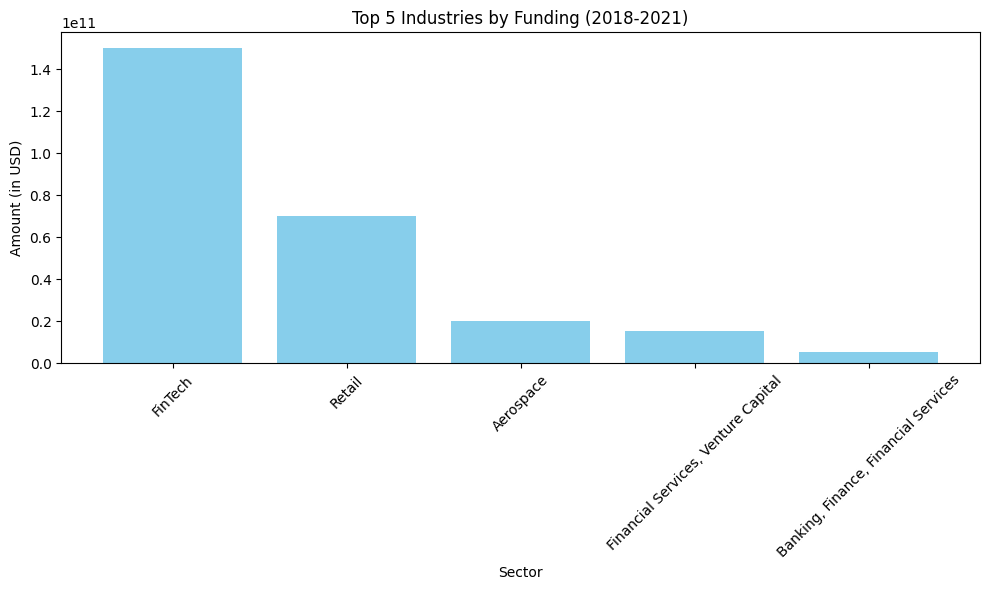

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the top 5 industries by funding
top_5 = cleaned_data.nlargest(5, 'Amount')

plt.figure(figsize=(10, 6))
plt.bar(top_5['Sector'], top_5['Amount'], color='skyblue')
plt.title('Top 5 Industries by Funding (2018-2021)')
plt.xlabel('Sector')
plt.ylabel('Amount (in USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. How does funding vary with the location of start-ups?**

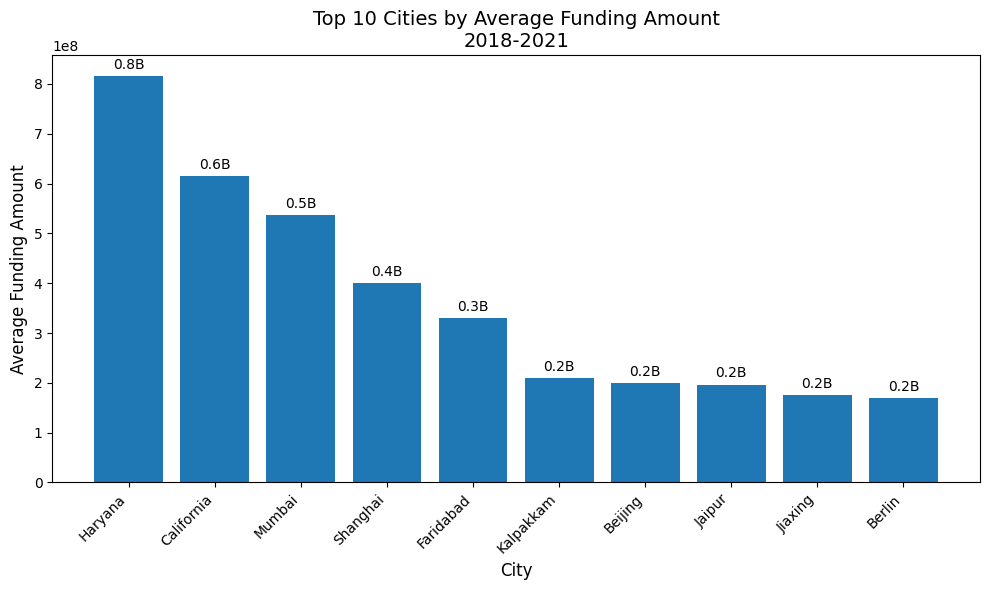

In [9]:
# Group by 'headquarter' and calculate the mean amount
location_funding = cleaned_data.groupby('HeadQuarter')['Amount'].mean().reset_index()

# Sort by mean funding amount and select the top 10 cities
top_10_cities = location_funding.sort_values('Amount', ascending=False).head(10)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_10_cities['HeadQuarter'], top_10_cities['Amount'])

# Add labels and title
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Funding Amount', fontsize=12)
plt.title('Top 10 Cities by Average Funding Amount\n2018-2021', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the mean funding amount
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height / 1e9:.1f}B',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Key Observation**

 Mumbai's startups get the most money on average. Shanghai gets less, quite a bit behind. It's like a funding showdown between the two cities.
 
 There's clear variation in funding across different cities. Mumbai, Shanghai, San Francisco, Kalpakkan, and Beijing startups are more likely to secure over $0.2 billion on average.



**3. What are the average funding amounts for  the different funding stages?**

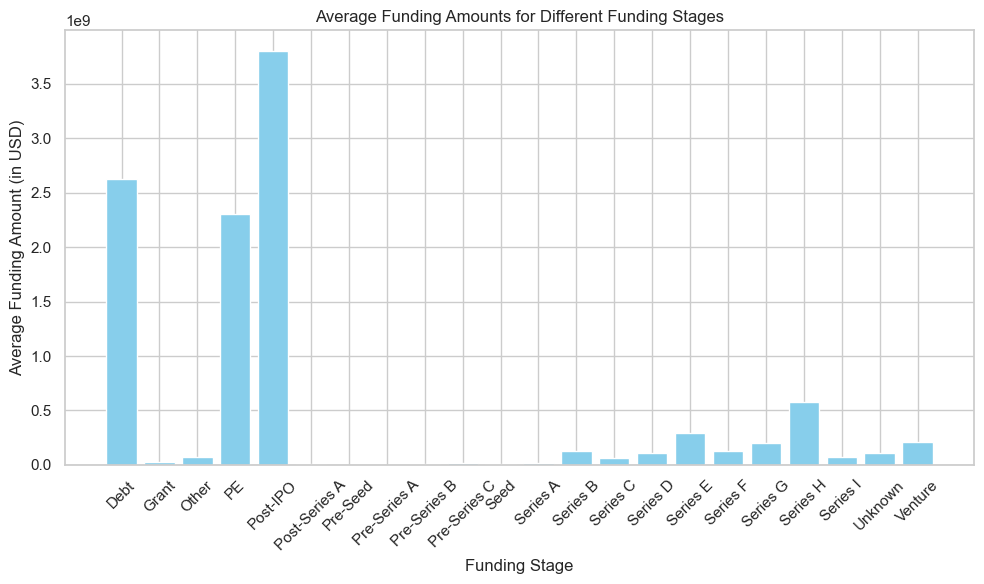

In [343]:
# Grouping by Stage and calculating the mean funding amount for each stage
average_funding_by_stage = cleaned_data.groupby('Stage')['Amount'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_funding_by_stage['Stage'],
        average_funding_by_stage['Amount'], color='skyblue')
plt.xlabel('Funding Stage')
plt.ylabel('Average Funding Amount (in USD)')
plt.title('Average Funding Amounts for Different Funding Stages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Observations:**

**High Investments in IPO and Grants**: The 'IPO' stage shows the highest average funding, followed closely by 'Grant'. These stages indicate significant capital investments likely due to the scale and maturity of businesses reaching IPO or receiving substantial grants.

**Private Equity and Debt Funding**: Both 'Private Equity (PE)' and 'Debt' funding stages also show considerable average funding amounts, suggesting strong financial support for start-ups in these stages.

**Early and Middle Stages**: The 'Pre-Seed', 'Seed', and 'Series A' stages, although lower in comparison, still receive notable funding, essential for the early growth phases of start-ups.

**Series Rounds Variation**: From 'Series B' onward, there is a drop in the average funding with fluctuations, peaking again at 'Series E'. This could reflect the varying success and growth potential perceived by investors in different rounds.

**4. What are the total funding amounts per sector?**

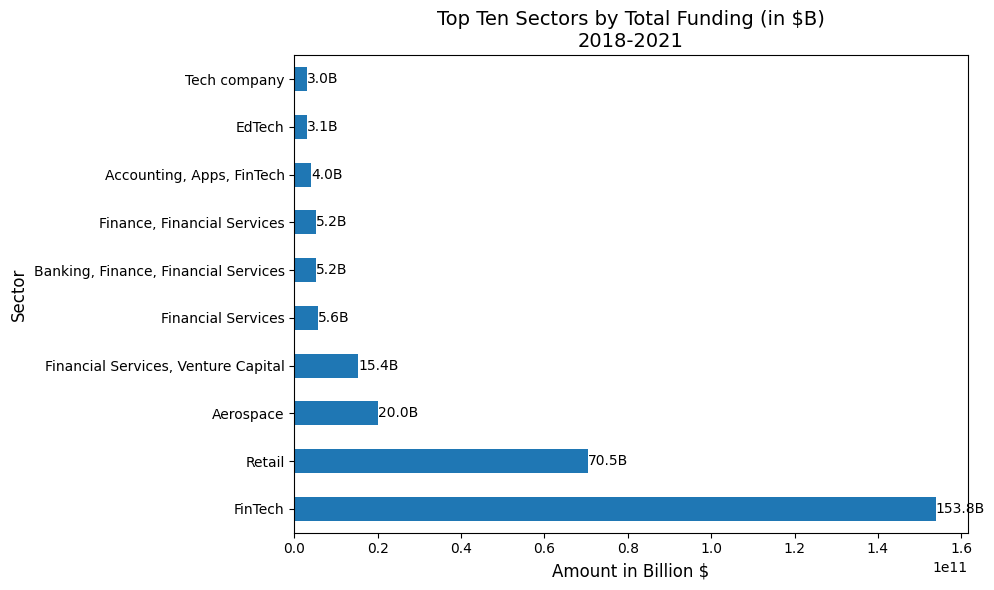

In [11]:
# Sort sectors by funding amount
sectors_by_funding = cleaned_data.groupby('Sector')['Amount'].sum().sort_values(ascending=False)

# Select top ten sectors
top_ten_sectors_by_funding = sectors_by_funding.head(10)

# Set Seaborn style
#sns.set_style("darkgrid")

# Plotting using Pandas
fig, ax = plt.subplots(figsize=(10, 6))
top_ten_sectors_by_funding.plot(kind='barh', ax=ax)
ax.set_title('Top Ten Sectors by Total Funding (in $B)\n2018-2021', fontsize=14)
ax.set_xlabel('Amount in Billion $', fontsize=12)
ax.set_ylabel('Sector', fontsize=12)

# Annotate the bars
for i, (sector, amount) in enumerate(top_ten_sectors_by_funding.items()):
    ax.annotate(f'{amount / 1e9:.1f}B', xy=(amount, i), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### **Key Observations**
Fintech and retail sectors stand out as the most attractive for investors.

The two sectors have received the most funding over the year

These sectors have received significant funding, making them key players in the startup investment landscape.

**5.How does funding vary within the various geographical locations for start-ups?**

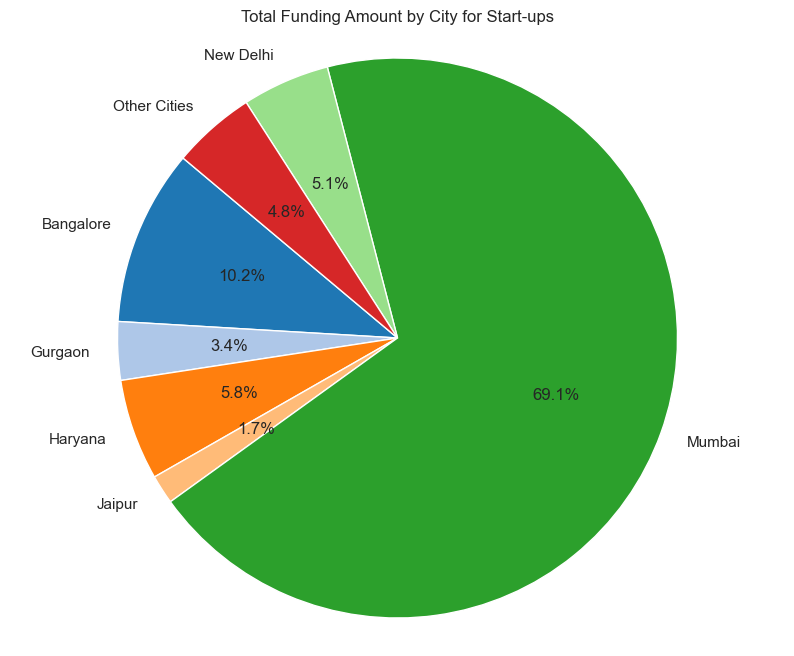

In [350]:
# Grouping by 'HeadQuarter' and summing the 'Amount'
funding_by_location = cleaned_data.groupby('HeadQuarter')['Amount'].sum().reset_index()

# Calculating the total funding
total_funding = funding_by_location['Amount'].sum()

# Determining the percentage contribution of each city
funding_by_location['Percentage'] = (funding_by_location['Amount'] / total_funding) * 100

# Separating cities with more than 1% funding
significant_cities = funding_by_location[funding_by_location['Percentage'] > 1]
other_cities = funding_by_location[funding_by_location['Percentage'] <= 1]

# Summing up the funding for other cities
other_cities_funding = other_cities['Amount'].sum()
other_cities_percentage = other_cities['Percentage'].sum()

# Adding 'Other Cities' to the significant cities dataframe
other_cities_row = pd.DataFrame({'HeadQuarter': ['Other Cities'], 'Amount': [other_cities_funding], 'Percentage': [other_cities_percentage]})
significant_cities = pd.concat([significant_cities, other_cities_row], ignore_index=True)

# Using a seaborn color palette
colors = sns.color_palette('tab20', len(significant_cities))

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(significant_cities['Amount'], labels=significant_cities['HeadQuarter'],
        autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Total Funding Amount by City for Start-ups')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


**Observations:**

- **Mumbai** stands out as the leading city in terms of start-up funding, receiving a substantial 69.1% of the total funding. This indicates a significant concentration of investment activities in Mumbai compared to other cities.

- **Bangalore**, known for its vibrant tech start-up community, follows with 10.2% of the funding. While substantial, it's notably lower than Mumbai, suggesting differing investor focus and possibly the sectors they invest in.

- **New Delhi** and **Gurgaon**, key players in the Northern India start-up scene, collectively account for around 8.2% of the funding, highlighting their roles but also suggesting room for growth compared to their southern counterparts.

- **Other Cities** together make up 11.6% of the total funding, indicating that while the majority of funds are concentrated in major cities, there is a spread across the country, supporting smaller hubs and diverse start-up ventures.


# **Summary and Recommendations**

### **Summary**

**Funding Trends**  
- Funding experienced a modest decline from 2018 to 2019, followed by a remarkable increase of over $176 billion from 2019 to 2021.
- 2021 stands out as the best-funded year, surpassing $179 billion.

**Geographical Dynamics**
- Mumbai is the most well-funded location, with other cities trailing at a considerable distance.
- Notable variations across cities, with Mumbai, Shanghai, San Francisco, Kalpakkan, and Beijing leading.

**Sector-Specific Insights**
- Retail and fintech sectors attract the most funding, with 'Others' (Private Equity, Corporate Round, Debt) showing substantial growth.

**Key Players**
- Silver Lake and Mubadala Investment Company lead all investors, contributing a massive $70 billion.

### **Recommendations**  
1. **Location Consideration:**  
   - Investors should focus on top-funded locations like Mumbai, Shanghai, San Francisco, Kalpakkan, and Beijing.  
   
2. **Sector-Specific Investments:**  
   - Explore opportunities in fintech and retail, the most attractive sectors for investors.  
   
3. **Emerging Trends:**  
   - Monitor trends in mature startups in the 'Others' category, signaling investor comfort with later-stage ventures.  
   
4. **Diversification:**  
   - Diversify portfolios across locations and sectors for a balanced risk-return profile.  
